## Javad Ranjbar Kermani
## 400209795
## Question 3
## Multi Layer Perceptron

In [ ]:
#import librarires
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
#importing train and test features and labels
drive.mount('/content/drive/')
X_train = np.load('/content/drive/MyDrive/Colab Notebooks/trainX.npy', allow_pickle=True)
y_train = np.load('/content/drive/MyDrive/Colab Notebooks/trainY.npy', allow_pickle=True)
X_test = np.load('/content/drive/MyDrive/Colab Notebooks/testX.npy', allow_pickle=True)
y_test = np.load('/content/drive/MyDrive/Colab Notebooks/testY.npy', allow_pickle=True)
print(y_train)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
[2 2 2 ... 5 5 5]


In [ ]:
# converting imported data to DataFram
df_train_features = pd.DataFrame(X_train)
df_train_targets = pd.DataFrame(y_train)
df_test_features = pd.DataFrame(X_test)
df_test_targets = pd.DataFrame(y_test)
df_train_features.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.949766,0.072579,0.572511,-0.738602,0.212578,0.433405,-0.994248,-0.991368,-0.993143,-0.988936
1,0.278419,-0.016411,-0.12352,-0.998245,-0.9753,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.982857,-0.192899,-0.225317,-0.01706,0.155777,0.082575,-0.995123,-0.996102,-0.995839,-0.996545
2,0.279653,-0.019467,-0.113462,-0.99538,-0.967187,-0.978944,-0.99652,-0.963668,-0.977469,-0.938692,...,-0.983454,-0.222829,-0.226831,0.059681,0.061476,0.041702,-0.993403,-0.995091,-0.994859,-0.99536
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.98275,-0.989302,-0.938692,...,-0.983966,-0.240719,-0.201985,0.054712,0.110072,-0.079423,-0.995502,-0.995267,-0.995305,-0.99536
4,0.276629,-0.01657,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.992338,-0.338699,-0.236993,0.09382,0.023333,0.039039,-0.995808,-0.995258,-0.996307,-0.992389


In [ ]:
from torch.utils.data import TensorDataset, DataLoader
BATCH_SIZE = 4
# converting dataframe to pytorch tensor
train_inputs = torch.tensor(df_train_features.values.astype(np.float32) , dtype=torch.float32)
train_targets = torch.tensor(df_train_targets.iloc[:,0].astype(np.float32), dtype=torch.float32)
test_inputs = torch.tensor(df_test_features.values.astype(np.float32) , dtype=torch.float32)
test_targets = torch.tensor(df_test_targets.iloc[:,0], dtype=torch.float32)
# Create a TensorDataset
trainset = TensorDataset(train_inputs, train_targets)
testset = TensorDataset(test_inputs, test_targets)
# Create a DataLoader with batch size of 32
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2) 
testloader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
print(train_targets.shape)

torch.Size([7352])


In [ ]:
from torch import nn
from torch.functional import F
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # different layers and norouns is considered
        self.layer1 = nn.Linear(256, 8)
        #self.layer2 = nn.Linear(100, 50)
        #self.layer3 = nn.Linear(50, 8)
        self.layer2 = nn.Linear(8, 6)
        #activation functions
        self.sigmoid = nn.Sigmoid() # for output layer
        self.tanh    = nn.Tanh() # for hidden layer

    def forward(self, x):
        x = self.layer1(x)
        x = self.tanh(x)
        #x = self.layer2(x)
        #x = self.tanh(x)
        #x = self.layer3(x)
        #x = self.tanh(x)
        x = self.layer2(x)
        x = self.sigmoid(x)

        return x

In [ ]:
from torch import optim
model = MLP() # creat a object
criterion = nn.CrossEntropyLoss() # loss function
optimizer = optim.SGD(model.parameters(), lr=0.01) # stochastic gradient descent optimizer

In [ ]:
epoch = 20 # number of epochs
train_loss_history = []
train_corrects_history = []
test_loss_history = []
test_corrects_history = []

for e in range(epoch):
  train_loss = 0
  train_corrects = 0
  test_loss = 0
  test_corrects = 0

  for inputs, labels in trainloader:
    labels = labels.type(torch.LongTensor)
    outputs = model(inputs) # every batch is put as an input
    loss = criterion(outputs, labels) # Calc loss after each batch by comparing it to actual labels

    optimizer.zero_grad() # setting the initila gradient to zero
    loss.backward() # backpropagation the loss
    optimizer.step() # optimizing the weights and bias values for every single step 
    
    _, preds = torch.max(outputs, 1) # taking the highest value of prediction
    train_loss += loss.item()  # calculating the loss and adding to train_loss
    train_corrects += torch.sum(preds == labels.data) # calculating the accuracy by taking the sum of all correct prediction in a batch
  with torch.no_grad(): # no need fo gradient
    for test_inputs , test_labels in testloader:
      test_labels = test_labels.type(torch.LongTensor)
      test_outputs = model(test_inputs) # every batch is put as an input
      loss_ = criterion(test_outputs,test_labels) # Calc loss after each batch by comparing it to actual labels
      _, test_preds = torch.max(test_outputs, 1) # taking the highest value of prediction
      test_loss += loss_.item() # calculating the loss and adding to train_loss
      test_corrects += torch.sum(test_preds == test_labels.data) # calculating the accuracy by taking the sum of all correct prediction in a batch
  
  epoch_loss = train_loss/(len(trainloader)) # training loss per epoch
  epoch_acc = train_corrects/(len(trainloader)*BATCH_SIZE)*100 # training accuracy per epoch
  train_loss_history.append(epoch_loss)
  train_corrects_history.append(epoch_acc.cpu().numpy())

  test_epoch_loss = test_loss/(len(testloader)) # testing loss per epoch
  test_epoch_acc = test_corrects/(len(testloader)*BATCH_SIZE)*100 # testing accuracy per epoch
  test_loss_history.append(test_epoch_loss)
  test_corrects_history.append(test_epoch_acc.cpu().numpy())

  print('epoch :', (e+1))
  print('train loss: {:.4f}, train acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
  print('test loss: {:.4f}, test acc {:.4f} '.format(test_epoch_loss, test_epoch_acc.item()))
       

epoch : 1
train loss: 1.5729, train acc 36.4935 
test loss: 1.4755, test acc 40.7734 
epoch : 2
train loss: 1.4504, train acc 43.7160 
test loss: 1.4391, test acc 42.9444 
epoch : 3
train loss: 1.4309, train acc 45.4162 
test loss: 1.4272, test acc 47.1167 
epoch : 4
train loss: 1.4224, train acc 46.6132 
test loss: 1.4204, test acc 47.6594 
epoch : 5
train loss: 1.4162, train acc 46.9124 
test loss: 1.4149, test acc 47.2863 
epoch : 6
train loss: 1.4096, train acc 46.9804 
test loss: 1.4083, test acc 46.3704 
epoch : 7
train loss: 1.4001, train acc 46.8988 
test loss: 1.4007, test acc 45.0814 
epoch : 8
train loss: 1.3879, train acc 47.7421 
test loss: 1.3890, test acc 46.3365 
epoch : 9
train loss: 1.3759, train acc 48.8439 
test loss: 1.3786, test acc 47.5916 
epoch : 10
train loss: 1.3653, train acc 49.9592 
test loss: 1.3687, test acc 49.3555 
epoch : 11
train loss: 1.3560, train acc 50.5441 
test loss: 1.3592, test acc 50.0000 
epoch : 12
train loss: 1.3476, train acc 50.8297 
te

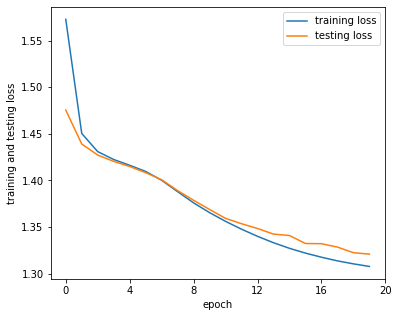

In [ ]:
# plot loss with respect to number of epochs for training and testing data
import math
plt.figure(figsize=(6,5))
plt.plot(train_loss_history, label= 'training loss')
plt.plot(test_loss_history, label= 'testing loss')
X = [0,4,8,12,16,20]
new_list = range(math.floor(min(X)), math.ceil(max(X))+1, 4)
plt.xticks(new_list)
plt.xlabel('epoch')
plt.ylabel('training and testing loss')
plt.legend()
plt.show()

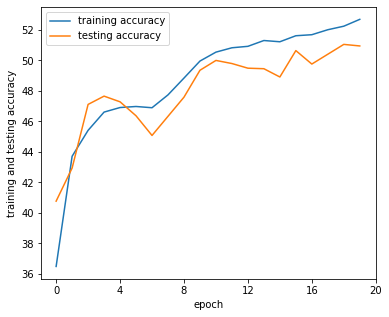

In [ ]:
# plot accuracy with respect to number of epochs for training and testing data
plt.figure(figsize=(6,5))
plt.plot(train_corrects_history, label= 'training accuracy')
plt.plot(test_corrects_history, label= 'testing accuracy')
X = [0,4,8,12,16,20]
new_list = range(math.floor(min(X)), math.ceil(max(X))+1, 4)
plt.xticks(new_list)
plt.xlabel('epoch')
plt.ylabel('training and testing accuracy')
plt.legend()
plt.show()

In [ ]:
# confusion matrix
from itertools import product
classes = ('0', '1', '2', '3', '4', '5', '6')
all_labels, all_predictions = [], []
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.cpu()
        labels = labels.cpu()
        outputs = model(images).cpu()
        _, predictions = torch.max(outputs, 1)
        all_labels.extend(labels.to('cpu'))
        all_predictions.extend(predictions.to('cpu'))
        

all_predictions = all_predictions
all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)
class_labels = np.unique(np.concatenate((all_labels, all_predictions)))
if class_labels.shape[0] == 1:
  if class_labels.shape[0] != 0:
    class_labels = np.array([0, class_labels[0]])
  else:
    class_labels = np.array([class_labels[0], 1])
n_labels = class_labels.shape[0]
lst =[]
z = list(zip(all_labels, all_predictions))
for combi in product(class_labels, repeat=2):
  lst.append(z.count(combi))
mat = np.asarray(lst)[:, None].reshape(n_labels, n_labels)
print(mat)


[[ 42   0 495   0   0   0]
 [ 23   0 465   0   0   3]
 [ 25   0 507   0   0   0]
 [  0   0   0 495   0   1]
 [  0   0   0 354  44  22]
 [  0   0   0  57   0 414]]
